## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

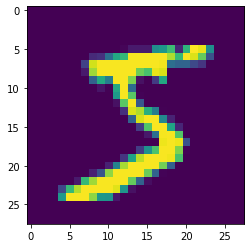

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
783/2

391.5

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [9]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [10]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [15]:
autoencoder.fit(X_train, X_train, epochs=5)
# autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1505 - accuracy: 0.2057
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1424 - accuracy: 0.2175
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1347 - accuracy: 0.2271
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1288 - accuracy: 0.23501s - loss: 0.1292 - 
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1248 - accuracy: 0.2416


In [16]:
passed_images = autoencoder.predict(X_test[:10])

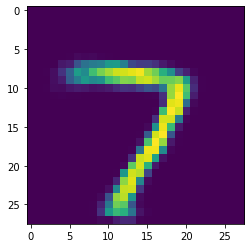

In [17]:
plt.imshow(passed_images[0])

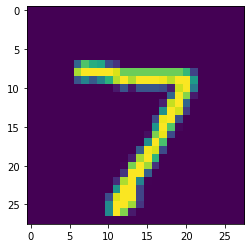

In [18]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [20]:
sample = GaussianNoise(0.2)

In [21]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



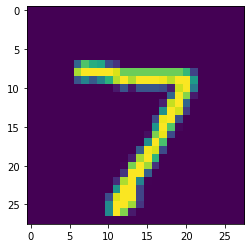

In [22]:
plt.imshow(X_test[0])

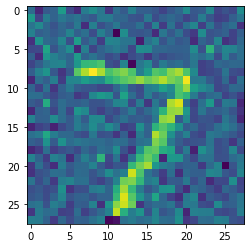

In [23]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [24]:
import tensorflow as tf
import numpy as np

In [25]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [26]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [27]:
noise_remover = Sequential([encoder, decoder])

In [28]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [30]:
noise_remover.fit(X_train, X_train, epochs=8)
# noise_remover.fit(X_train, X_train, epochs=8,
#                            validation_data=[X_test, X_test])  # tesnorflow issue

Epoch 1/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1303 - accuracy: 0.2300
Epoch 2/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1216 - accuracy: 0.2445
Epoch 3/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1157 - accuracy: 0.2537
Epoch 4/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1121 - accuracy: 0.2601
Epoch 5/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1097 - accuracy: 0.2650
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1079 - accuracy: 0.2683
Epoch 7/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1063 - accuracy: 0.27180s - loss: 0.1064 - accuracy
Epoch 8/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1048 - accuracy: 0.2749


In [31]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


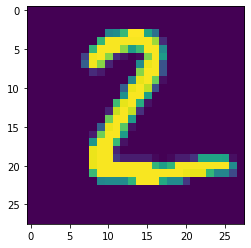

The Noisey Version


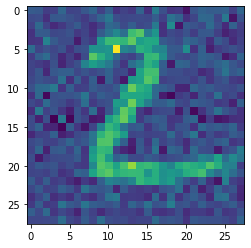

After going through denoiser


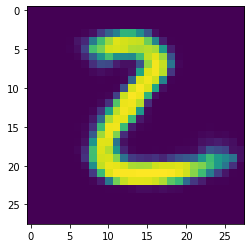

In [32]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()